# TM10007 Assignment template

In [1]:
# Run this to use from colab environment
#!pip install -q --upgrade git+https://github.com/jveenland/tm10007_ml.git

# General packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets as ds
import seaborn

# Preprocessing
from sklearn import model_selection

# Classifiers and kernels
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.decomposition import PCA, KernelPCA
from sklearn.kernel_approximation import RBFSampler
from sklearn.metrics.pairwise import rbf_kernel, sigmoid_kernel
from sklearn.model_selection import GridSearchCV, StratifiedKFold 
from sklearn import metrics
from sklearn.metrics import roc_auc_score, f1_score
from sklearn.preprocessing import LabelEncoder

## Data loading and cleaning

Below are functions to load the dataset of your choice. After that, it is all up to you to create and evaluate a classification method. Beware, there may be missing values in these datasets. Good luck!

In [2]:
from worclipo.load_data import load_data

data = load_data()
print(f'The number of samples: {len(data.index)}')
print(f'The number of columns: {len(data.columns)}')
print(data)

The number of samples: 115
The number of columns: 494
                  label  PREDICT_original_sf_compactness_avg_2.5D  \
ID                                                                  
Lipo-001_0  liposarcoma                                  0.368434   
Lipo-002_0  liposarcoma                                  0.660571   
Lipo-003_0       lipoma                                  0.365191   
Lipo-004_0  liposarcoma                                  0.372210   
Lipo-005_0       lipoma                                  0.369120   
...                 ...                                       ...   
Lipo-111_0       lipoma                                  0.244813   
Lipo-112_0  liposarcoma                                  0.197353   
Lipo-113_0  liposarcoma                                  0.307562   
Lipo-114_0       lipoma                                  0.577333   
Lipo-115_0  liposarcoma                                  0.635282   

            PREDICT_original_sf_compactness_std_

In [3]:
"""Splitting the data into a test and training dataset: outer cross-validation"""
#Outer cross-validation
#Split the dataset in train and test part
data_train, data_test = model_selection.train_test_split(data, test_size=0.20)
print(f'The number of samples train: {len(data_train.index)}')
print(f'The number of columns train: {len(data_train.columns)}')
print(f'The number of samples test: {len(data_test.index)}')
print(f'The number of columns test: {len(data_test.columns)}')

The number of samples train: 92
The number of columns train: 494
The number of samples test: 23
The number of columns test: 494


In [4]:
# Outliers detecteren en vervangen
from outliers import outlier_detection
data_train, total_outliers = outlier_detection(data_train)
print("\nTotaal aantal gecapte outliers train data:", total_outliers)

data_test, total_outliers = outlier_detection(data_test)
print("\nTotaal aantal gecapte outliers test data:", total_outliers)

c:\Users\robin\Documents\Technical medicine\TM10007 Machine Learning\Group assignment\TM10007_ML_Project_group_9\outliers.py:9: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  z_scores = zscore(data[column])
c:\Users\robin\Documents\Technical medicine\TM10007 Machine Learning\Group assignment\TM10007_ML_Project_group_9\outliers.py:16: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[29.80724864 29.80724864 29.80724864 29.80724864 29.80724864]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[outliers,column] = np.clip(data.loc[outliers,column], mean_value - drempel * std_value, mean_value + drempel * std_value)
c:\Users\robin\Documents\Technical medicine\TM10007 Machine Learning\Group assignment\TM10007_ML_Project_group_9\outliers.py:9


Totaal aantal gecapte outliers train data: 647


c:\Users\robin\Documents\Technical medicine\TM10007 Machine Learning\Group assignment\TM10007_ML_Project_group_9\outliers.py:9: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  z_scores = zscore(data[column])
c:\Users\robin\Documents\Technical medicine\TM10007 Machine Learning\Group assignment\TM10007_ML_Project_group_9\outliers.py:9: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  z_scores = zscore(data[column])
c:\Users\robin\Documents\Technical medicine\TM10007 Machine Learning\Group assignment\TM10007_ML_Project_group_9\outliers.py:9: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  z_scores = zscore(data[column])
c


Totaal aantal gecapte outliers test data: 232


c:\Users\robin\Documents\Technical medicine\TM10007 Machine Learning\Group assignment\TM10007_ML_Project_group_9\outliers.py:16: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[26.23533313]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[outliers,column] = np.clip(data.loc[outliers,column], mean_value - drempel * std_value, mean_value + drempel * std_value)


In [5]:
from prepro_data import processing_data_scaling
#This data is scaled and a variance and correlation threshold are applied
data_scaled, df_label, df_processed= processing_data_scaling(data_train)
print(data_scaled)

                  label         0         1         2         3         4  \
ID                                                                          
Lipo-104_0       lipoma -1.055383 -0.991953 -0.450954 -0.588900 -0.636833   
Lipo-033_0       lipoma  1.226891  1.377172  2.801313  0.754972  0.903909   
Lipo-093_0       lipoma -1.368133 -1.027281 -0.639669 -1.028207 -0.947882   
Lipo-064_0  liposarcoma -0.664344 -0.539486  0.100810 -0.524690  0.038083   
Lipo-037_0       lipoma -1.490000 -1.493927 -0.746505 -0.996203 -0.980301   
...                 ...       ...       ...       ...       ...       ...   
Lipo-092_0       lipoma  0.063722  0.301691  0.016819 -0.824770 -0.769068   
Lipo-047_0       lipoma -1.199312 -1.206079 -0.737341 -0.907191 -0.879772   
Lipo-100_0  liposarcoma -1.044602 -0.891706 -0.308847 -0.904048 -0.937657   
Lipo-057_0       lipoma -0.650509 -0.785644 -0.545291 -0.503067 -0.579964   
Lipo-019_0       lipoma -0.461349 -0.134924 -0.406112 -0.599701 -0.586251   

In [6]:
from prepro_data import processing_data_pca

# This data is scaled, a variance and correlation threshold are applied, 
# and PCA brought back the number of features to 36
data_pca, df_label, df_processed, pca = processing_data_pca(data_train)

# Now you can access the PCA object and print or analyze it
print(f"PCA Explained Variance Ratio: {pca.explained_variance_ratio_}")

PCA object: PCA(n_components=0.95)
Explained variance ratio: [0.32095962 0.12945729 0.08206296 0.04913487 0.0378749  0.02960006
 0.02524964 0.02419167 0.02180769 0.02065499 0.01795782 0.01692785
 0.01453227 0.01333271 0.01263439 0.01189136 0.01122211 0.01103217
 0.01022346 0.00914671 0.00830097 0.00824692 0.0078296  0.0064852
 0.00620942 0.00577586 0.00557366 0.00519052 0.00494968 0.00460811
 0.004552   0.00414829 0.00392909 0.00376704 0.00367805]
PCA Explained Variance Ratio: [0.32095962 0.12945729 0.08206296 0.04913487 0.0378749  0.02960006
 0.02524964 0.02419167 0.02180769 0.02065499 0.01795782 0.01692785
 0.01453227 0.01333271 0.01263439 0.01189136 0.01122211 0.01103217
 0.01022346 0.00914671 0.00830097 0.00824692 0.0078296  0.0064852
 0.00620942 0.00577586 0.00557366 0.00519052 0.00494968 0.00460811
 0.004552   0.00414829 0.00392909 0.00376704 0.00367805]


In [45]:
from prepro_data import processing_data_rfecv
#This data is scaled, a variance and correlation threshold are applied,
# and RFECV brought back the number of features to 61 (takes a bit longer to run)
data_rf, df_label, df_processed= processing_data_rfecv(data_train)
print(data_rf)

                 1         4         5         7         8         11   \
ID                                                                       
Lipo-044_0 -0.737028 -0.116139 -1.326148 -1.371583 -0.283817 -0.839010   
Lipo-038_0 -0.458109  0.028625  1.077180 -0.032857 -0.815991 -0.439691   
Lipo-046_0  0.528395  0.851021  1.104158  1.440661 -0.572284 -1.030949   
Lipo-073_0  0.748265  0.380830  1.055148 -0.139019 -0.830476  1.354088   
Lipo-104_0 -0.984459 -0.589941  1.081497 -1.202987 -0.897960  1.401515   
...              ...       ...       ...       ...       ...       ...   
Lipo-082_0 -0.946621 -0.371030  1.077974  1.304756 -0.621539  1.979823   
Lipo-050_0 -0.894468 -0.424539  1.098589  1.181239 -0.047281 -0.665495   
Lipo-024_0 -0.067439 -0.104212 -0.087685  0.004424 -0.993149 -0.471764   
Lipo-072_0  0.629468  0.536391 -1.317887 -1.376367 -1.032384  0.141511   
Lipo-097_0  1.077495 -0.880214 -1.354274 -1.356908  1.263318 -0.176041   

                 16        17        

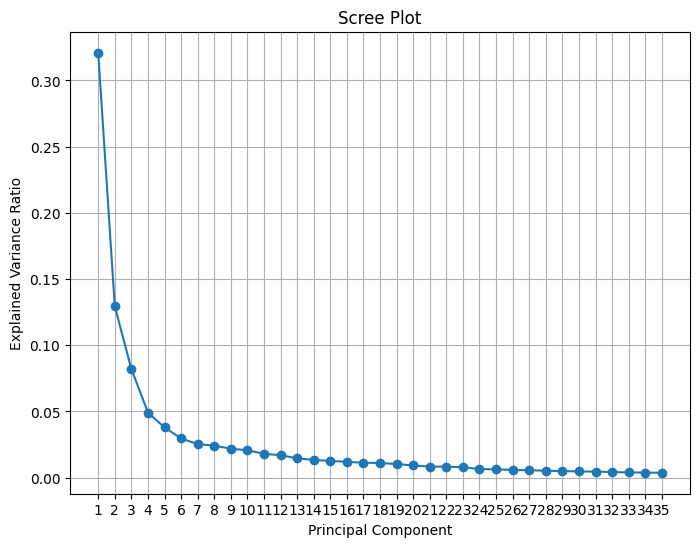

In [7]:
"""Plotting the PCA data"""
#Scree plot 
# You can access the explained variance ratio from the PCA object used to fit the data
explained_variance = pca.explained_variance_ratio_

# Create a scree plot
plt.figure(figsize=(8,6))
plt.plot(np.arange(1, len(explained_variance) + 1), explained_variance, marker='o')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.xticks(np.arange(1, len(explained_variance) + 1))
plt.grid(True)
plt.show()

In [24]:
"""Support Vector Machine"""
# Split data into features and labels
X = data_pca.drop(data_pca.columns[[0, 1]], axis=1)  # Features
le = LabelEncoder()
Y = le.fit_transform(df_label['label'])  # Now Y is numeric (0 or 1)

# Set up the parameter grid for GridSearchCV
param_grid = [
    {'kernel': ['linear'], 'C': [0.1, 1, 10]},
    {'kernel': ['rbf'], 'C': [0.1, 1, 10], 'gamma': ['scale', 'auto', 0.1, 1]},
    {'kernel': ['poly'], 'C': [0.1, 1, 10], 'degree': [3, 4, 5], 'gamma': ['scale', 'auto', 0.1, 1], 'coef0': [0.0, 0.1, 0.5]},
]

# Set up the SVM classifier
svm_classifier = SVC(random_state=42, probability=True)  # Enable probability for AUC calculation

# Set up inner cross-validation for hyperparameter tuning
inner_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Set up GridSearchCV to search for the best hyperparameters
grid_search = GridSearchCV(
    estimator=svm_classifier, 
    param_grid=param_grid, 
    cv=inner_cv, 
    n_jobs=-1, 
    verbose=1, 
    scoring=['roc_auc', 'f1'],  # Optimize for both AUC and F1-score
    refit='roc_auc'  # Select the best model based on AUC
)

# Perform the grid search on the training data to find the best hyperparameters
grid_search.fit(X, Y)

# Get the best model (with the best hyperparameters)
best_model = grid_search.best_estimator_

# Make predictions to evaluate performance
y_pred = best_model.predict(X)
y_pred_proba = best_model.predict_proba(X)[:, 1]  # Probability estimates for AUC

# Convert categorical labels to numerical labels (0 or 1)
le = LabelEncoder()
Y = le.fit_transform(Y)  # 'lipoma' -> 0, 'liposarcoma' -> 1

# Ensure predictions are also numerical
y_pred = best_model.predict(X)
y_pred = le.transform(y_pred)  # Convert categorical predictions ('lipoma', 'liposarcoma') to 0 and 1

# Calculate evaluation metrics
auc_score = roc_auc_score(Y, y_pred_proba)
f1 = f1_score(Y, y_pred)

# Print results
print(f"Best hyperparameters: {grid_search.best_params_}")
print(f"Training AUC: {auc_score:.4f}")
print(f"Training F1-score: {f1:.4f}")

Fitting 5 folds for each of 123 candidates, totalling 615 fits
Best hyperparameters: {'C': 1, 'coef0': 0.0, 'degree': 5, 'gamma': 'scale', 'kernel': 'poly'}
Training AUC: 1.0000
Training F1-score: 0.7353


In [ ]:
"""Random Forest"""

rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(df_processed, df_label) #Input is nu dataframe met alleen de features en dataframe met alleen de labels
y_val_pred = rf_classifier.predict(data_val)
val_accuracy = accuracy_score(df_label_val, y_val_pred)
print(f'Validation Accuracy without hyperparameters: {val_accuracy * 100:.2f}%')

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param_grid, cv=5)
grid_search.fit(data_train, df_label)
print("Best Parameters:", grid_search.best_params_)
best_rf = grid_search.best_estimator_
y_val_pred_best = best_rf.predict(data_val)
val_accuracy_best = accuracy_score(df_label_val, y_val_pred_best)
print(f'Validation Accuracy (Best Model): {val_accuracy_best * 100:.2f}%')